In [1]:
# from textblob import TextBlob
import pandas as pd
import re
import torch
import emoji

In [2]:

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.get_device_name(0)

/home/sam/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:104: UserWarning: 
NVIDIA GeForce RTX 3050 Ti Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3050 Ti Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [4]:
df = pd.read_csv("../data/amh_datasetall .txt")
df.head()
df2 = pd.read_csv("../data/Amharic_dataset.txt")

In [26]:
len(df)

38424

In [29]:
df.columns = ["texts", "labels"]
df2.columns = ["texts", "labels"]

In [32]:
df_new = pd.concat([df2, df], ignore_index=True, )

In [34]:
len(df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"])
df_new.drop_duplicates(inplace=True)
len(df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"])

1

In [35]:
df_new[df_new["texts"] == "ፈጣሪ ይባርካቹ"]

,texts,labels
0,ፈጣሪ ይባርካቹ,positive


In [36]:
len(df_new)

28682

In [16]:
df.to_csv("../data/amahric_testdata.csv", index=False)

In [42]:
df = pd.read_csv("../data/new_data.csv")
df.tail()

,texts,labels
50021,መልካም ዉይይት,neutral
50022,ዝናሽን ልገምግማት,neutral
50023,ሞቶ ስዳርስ ነው ንሳ ማግባታ አብይ,neutral
50024,አብይ ሰለ ጉራጌ ተንፍስ አብይ በጉራጌ ዞን ሚደረገዉ እነደ አልሰማ ዝ...,neutral
50025,በጉራጌ ዞን ብርሀኑ ነጋ የመረጠዉ የለም ለምን ጠቅላይ ሚንስተር አብይ ...,neutral


In [47]:
df["labels"] = df["labels"].str.strip()
df["labels"] = df["labels"].str.replace("neutrall", "neutral", regex=True)



In [48]:
df.labels.value_counts()

negative    21914
positive    16063
neutral     12043
Name: labels, dtype: int64

In [49]:
df_new = df[df.labels != "neutral"]
df_new.labels.value_counts()

negative    21914
positive    16063
Name: labels, dtype: int64

In [55]:
df_new_neg = df_new[df_new.labels == "negative"][:16063]
df_new_pos = df_new[df_new.labels != "negative"]
df_redu = pd.concat([df_new_neg, df_new_pos])
df_redu.labels.value_counts()

negative    16063
positive    16063
Name: labels, dtype: int64

In [58]:
df_redu = df_redu.sample(frac=1).reset_index(drop=True)
df_redu.head()

,texts,labels
0,የአማራ ፅንፈኛ ሀይሎች እንኳን አብይ አህመድን እርስ በራሳቸው እንኳ ቢሮ...,positive
1,ስለ ሰዉ ማንነት ብቻ እዉቀት ያለው ከሚያውቀው ውጪ ማሠብም ማውራትም አይ...,negative
2,ኣንድ ክልል በዉጫው ሐይል ህዝብ ያስደበደበስ የህዝቡንብረት ያስጨረሰ...,positive
3,አዎ አብረን ዝም እንበል ዘመን ተሻጋሪ ግጥም,positive
4,በጣም ይገርማል ያሁሉ ሲሞት የት ነበርክ ኧረ ሞት ይሻላል,negative


In [60]:
len(df_redu["texts"])

32132

In [4]:
df["labels"].unique()

array(['neutral', 'positive', 'negative', '\tnegative', '\tpositive',
       'neutra', nan], dtype=object)

In [64]:
# df[df["labels"] == "neutrall"]
df_redu.loc[2693]

texts     ከቆለጥ ማንጠልጠል የተረፍንበት ሰባተኛዉ ዓመት እያከበርን ባለንበት ጊዜ ...
labels                                             positive
Name: 2693, dtype: object

In [6]:
df = df.dropna(subset=["labels"])

In [41]:
df["labels"].value_counts()

negative     21914
positive     16064
positivel    12042
Name: labels, dtype: int64

In [65]:
labels = df_redu["labels"].to_list()
len(labels)

32132

In [66]:
ls = df_redu["texts"].to_list()
len(ls)

32132

In [67]:
STOP_WORDS = set(
    """
ግን አንቺ አንተ እናንተ ያንተ ያንቺ የናንተ ራስህን ራስሽን ራሳችሁን
ሁሉ ኋላ በሰሞኑ አሉ በኋላ ሁኔታ በኩል አስታውቀዋል ሆነ በውስጥ
አስታውሰዋል ሆኑ ባጣም እስካሁን ሆኖም በተለይ አሳሰበ ሁል በተመለከተ
አሳስበዋል ላይ በተመሳሳይ አስፈላጊ ሌላ የተለያየ አስገነዘቡ ሌሎች የተለያዩ
አስገንዝበዋል ልዩ ተባለ አብራርተዋል መሆኑ ተገለጸ አስረድተዋል  ተገልጿል
ማለቱ ተጨማሪ እባክህ የሚገኝ ተከናወነ እባክሽ ማድረግ ችግር አንጻር ማን
ትናንት እስኪደርስ ነበረች እንኳ ሰሞኑን ነበሩ እንኳን ሲሆን ነበር እዚሁ ሲል
ነው እንደገለጹት አለ ና እንደተናገሩት ቢሆን ነገር እንዳስረዱት ብለዋል ነገሮች
እንደገና ብዙ ናት ወቅት ቦታ ናቸው እንዲሁም በርካታ አሁን እንጂ እስከ
ማለት የሚሆኑት ስለማናቸውም ውስጥ ይሆናሉ ሲባል ከሆነው ስለዚሁ ከአንድ
ያልሆነ ሳለ የነበረውን ከአንዳንድ በማናቸውም በሙሉ የሆነው ያሉ በእነዚሁ
ወር መሆናቸው ከሌሎች በዋና አንዲት ወይም
በላይ እንደ በማቀድ ለሌሎች በሆኑ ቢሆንም ጊዜና  ይሆኑበታል በሆነ አንዱ
ለዚህ ለሆነው ለነዚህ ከዚህ የሌላውን ሶስተኛ አንዳንድ ለማንኛውም የሆነ ከሁለት
የነገሩ ሰኣት አንደኛ እንዲሆን እንደነዚህ ማንኛውም ካልሆነ የሆኑት  ጋር ቢያንስ
ይህንንም እነደሆነ እነዚህን ይኸው  የማናቸውም
በሙሉም ይህችው በተለይም አንዱን የሚችለውን በነዚህ ከእነዚህ በሌላ
የዚሁ ከእነዚሁ ለዚሁ በሚገባ ለእያንዳንዱ የአንቀጹ ወደ ይህም ስለሆነ ወይ
ማናቸውንም ተብሎ እነዚህ መሆናቸውን የሆነችን ከአስር ሳይሆን ከዚያ የለውም
የማይበልጥ እንደሆነና እንዲሆኑ  በሚችሉ ብቻ ብሎ ከሌላ የሌላቸውን
ለሆነ በሌሎች ሁለቱንም በቀር ይህ በታች አንደሆነ በነሱ
ይህን የሌላ እንዲህ ከሆነ ያላቸው በነዚሁ በሚል የዚህ ይህንኑ
በእንደዚህ ቁጥር ማናቸውም ሆነው ባሉ በዚህ በስተቀር ሲሆንና
በዚህም መሆን ምንጊዜም እነዚህም በዚህና ያለ ስም
ሲኖር ከዚህም መሆኑን በሁኔታው የማያንስ እነዚህኑ ማንም ከነዚሁ
ያላቸውን እጅግ ሲሆኑ ለሆኑ ሊሆን  ለማናቸውም
""".split()
)

In [68]:
def filter_stop_words(ls):
    new_ls_stop = []
    for input in ls:
        cleaned = [w for w in input.split(" ") if not w in STOP_WORDS]
        new_ls_stop.append(" ".join(cleaned).strip())

    return new_ls_stop
    
def remove_emojis(ls):
    new_ls = []
    for input in ls:
        new_ls.append(emoji.replace_emoji(input)
)
    return new_ls
    
def remove_punc_and_special_chars(ls): 
    new_ls = []
    for text in ls:
        text = str(text)
        normalized_text = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',text)
        new_ls.append(normalized_text)
    return new_ls

def remove_ascii_and_numbers(ls):
    new_ls = []
    for text_input in ls:
        text_input = str(text_input)
        rm_num_and_ascii=re.sub('[A-Za-z0-9]','',text_input)
        text = re.sub('[\'\u1369-\u137C\']+','',rm_num_and_ascii)
        new_ls.append(text)
    return new_ls

In [69]:
new_ls = remove_punc_and_special_chars(ls)
new_ls = remove_ascii_and_numbers(new_ls)
new_ls = remove_emojis(new_ls)
new_ls = filter_stop_words(new_ls)
len(new_ls)

32132

In [70]:
def normalize_char_level_missmatch(ls):
        new_ls = []
        for input_token in ls:
                input_token = str(input_token)
                rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
                rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
                rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
                rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
                rep5=re.sub('[ሕኅ]','ህ',rep4)
                rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
                rep7=re.sub('[ሠ]','ሰ',rep6)
                rep8=re.sub('[ሡ]','ሱ',rep7)
                rep9=re.sub('[ሢ]','ሲ',rep8)
                rep10=re.sub('[ሣ]','ሳ',rep9)
                rep11=re.sub('[ሤ]','ሴ',rep10)
                rep12=re.sub('[ሥ]','ስ',rep11)
                rep13=re.sub('[ሦ]','ሶ',rep12)
                rep14=re.sub('[ዓኣዐ]','አ',rep13)
                rep15=re.sub('[ዑ]','ኡ',rep14)
                rep16=re.sub('[ዒ]','ኢ',rep15)
                rep17=re.sub('[ዔ]','ኤ',rep16)
                rep18=re.sub('[ዕ]','እ',rep17)
                rep19=re.sub('[ዖ]','ኦ',rep18)
                rep20=re.sub('[ጸ]','ፀ',rep19)
                rep21=re.sub('[ጹ]','ፁ',rep20)
                rep22=re.sub('[ጺ]','ፂ',rep21)
                rep23=re.sub('[ጻ]','ፃ',rep22)
                rep24=re.sub('[ጼ]','ፄ',rep23)
                rep25=re.sub('[ጽ]','ፅ',rep24)
                rep26=re.sub('[ጾ]','ፆ',rep25)
                #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
                rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
                rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
                rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
                rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
                rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
                rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
                rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
                rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
                rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
                rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
                rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
                rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
                rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
                rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
                rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
                rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
                rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
                rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
                rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
                rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
                rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
                rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
                new_ls.append(rep48)
        return new_ls

In [71]:
new_ls = normalize_char_level_missmatch(new_ls)
len(new_ls)

32132

In [72]:
new_ls2 = []
for text in new_ls:
    text = re.sub("[\ufeff]",'',text)
    new_ls2.append(text)
len(new_ls2)

32132

In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [25]:
net.to(device)

NameError: name 'net' is not defined

In [73]:
from collections import Counter

all_text2 = ' '.join(new_ls2)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [74]:
total_words

348258

In [75]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}


In [76]:
reviews_int = []
for review in new_ls2:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
# print (reviews_int[0:3])
print(len(reviews_int))

32132


In [77]:
# encoded_labels = [1 if label =='positive' elif label == "" 0 for label in labels_split]
import numpy as np
encoded_labels = []
for label in labels:
    # if label == "strongNegative":
    #     encoded_labels.append(0)
    if label == "negative":
        encoded_labels.append(0)
    # elif label == "neutral":
    #     encoded_labels.append(1)
    else:
        encoded_labels.append(1)
    # else:
    #     encoded_labels.append(4)
encoded_labels = np.array(encoded_labels)

In [78]:
len(encoded_labels)

32132

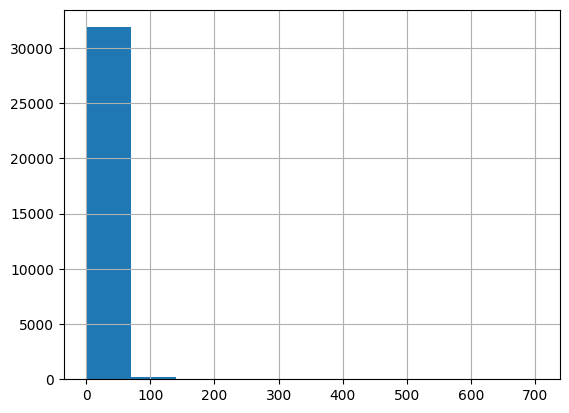

count    32132.000000
mean        10.838354
std         14.610802
min          0.000000
25%          4.000000
50%          7.000000
75%         13.000000
max        703.000000
dtype: float64

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [80]:
len(reviews_int)

32132

In [81]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [82]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [83]:
features = pad_features(reviews_int, 20)
print (features[:10,:])

[[    0     0     0     0     0     0     0     0    67  1570   497    12
   6003   862  2513   632  4716 12691  8189 17905]
 [    0    56   179   931  5287    32 17906   449 17907 31059   251    56
    218  4717    56   218    88  2514    13  3346]
 [   11    26 31060   127     3 31061 31062 31063    53   252  2111   704
    146  9854   820   471 31064     2 31065 31066]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0   549   932    61  2003    71  9855  2856]
 [    0     0     0     0     0     0     0     0     0     0     0     8
    257  3347  2004    79  2686   112   170   199]
 [    0     0     0     0     0     0     0     0   933   103  1133 31068
  17908 31069   297 31070 17909    10 31071     5]
 [    0     0     0     0     0     0     0     0     0 31072 31073 31074
    836   450   486 31075  9856  1249    45  6004]
 [    0     0     0   216     1   168 17910   298     6     1    26   475
    322 17911   723  8190     7  6959 12692    38]


In [84]:
split_frac = 0.8
train_x = features[0:int(split_frac*len(features))]
train_y = encoded_labels[0:int(split_frac*len(features))]
remaining_x = features[int(split_frac*len(features)):]
remaining_y = encoded_labels[int(split_frac*len(features)):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [85]:
np.array(train_x)

array([[    0,     0,     0, ..., 12691,  8189, 17905],
       [    0,    56,   179, ...,  2514,    13,  3346],
       [   11,    26, 31060, ...,     2, 31065, 31066],
       ...,
       [   47, 84536, 84537, ..., 84541,  1073,   870],
       [    0,     0,     0, ..., 84552,   268,   192],
       [    0,     0,     0, ...,   222,  1785,  2316]])

In [86]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.array(train_x)), torch.from_numpy(np.array(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.array(valid_x)), torch.from_numpy(np.array(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.array(test_x)), torch.from_numpy(np.array(test_y)))
# dataloaders
batch_size = 32
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [87]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [88]:
import torch.nn as nn

train_on_gpu = False
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid() # for outputs more than 1 Softmax()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                        weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [89]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1 # 3 for our case
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(97902, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [90]:

# loss and optimization functions
lr=0.001

criterion = nn.BCELoss() # for more than one output CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
# if(train_on_gpu):
#     net.cuda()

net.train()
train_on_gpu=False
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                # if(train_on_gpu):
                #     inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/3... Step: 100... Loss: 0.692842... Val Loss: 0.692071
Epoch: 1/3... Step: 200... Loss: 0.659829... Val Loss: 0.689900
Epoch: 1/3... Step: 300... Loss: 0.685435... Val Loss: 0.690101
Epoch: 1/3... Step: 400... Loss: 0.726474... Val Loss: 0.684682
Epoch: 1/3... Step: 500... Loss: 0.667493... Val Loss: 0.683957
Epoch: 1/3... Step: 600... Loss: 0.691564... Val Loss: 0.685495
Epoch: 1/3... Step: 700... Loss: 0.707505... Val Loss: 0.682292
Epoch: 1/3... Step: 800... Loss: 0.722550... Val Loss: 0.680156
Epoch: 2/3... Step: 900... Loss: 0.590708... Val Loss: 0.710195
Epoch: 2/3... Step: 1000... Loss: 0.637196... Val Loss: 0.715642
Epoch: 2/3... Step: 1100... Loss: 0.674276... Val Loss: 0.736934
Epoch: 2/3... Step: 1200... Loss: 0.626586... Val Loss: 0.731754
Epoch: 2/3... Step: 1300... Loss: 0.617775... Val Loss: 0.756086
Epoch: 2/3... Step: 1400... Loss: 0.666425... Val Loss: 0.715473
Epoch: 2/3... Step: 1500... Loss: 0.717966... Val Loss: 0.726866
Epoch: 2/3... Step: 1600... Loss: 

In [91]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    # if(train_on_gpu):
    #     inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.021
Test accuracy: 0.529


In [111]:
test_loader

In [45]:

from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review("ሙከራ ነው ይሄ ቢሰራ ደስ ይለኛል")
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive post detected!")
    else:
        print("Negative post detected.")
        


[[2312, 1, 47, 1855, 18, 1852]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 

In [72]:
test_review = 'ትግራይና አማራ ይገደል ይሙት' #ጥቅም የለውምና ይጥፉ
seq_length=200 
predict(net, test_review, seq_length)


Prediction value, pre-rounding: 0.225311
Negative review detected.


In [47]:
test_review = 'ሙከራ ነው ይሄ ቢሰራ ደስ ይለኛል'
seq_length=200 
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.921153
Positive review detected!


In [53]:
test_review = 'ኢትዮጲያ አያስፈልግም'
seq_length=200 
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.232898
Negative review detected.


In [51]:
test_review = 'የሰላም እና የፍቅር አመት ይሁንልን'
seq_length=200 
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.998828
Positive review detected!


# Naive bayes

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(new_ls2).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
unique_label = list(set(labels))
Y= []
for i in labels:
    Y.append(unique_label.index(i))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [63]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3871361338678752